# A4: Visualization for Exploratory Data Analysis

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Background and Objective

Effective use of graphs as visual representations of data is an important skill for a data scientist. [Lecture 4](https://coursys.sfu.ca/2024sp-cmpt-733-g1/pages/lec4) gave you an introduction to principles of visualization design. In this assignment we will apply these principles when working with real-estate data.

After completing this assignment, you should be able to use, create, and improve data plots to make them effective tools to find and carry messages from your data.
We will perform visual data analysis using Python and gain experience with geospatial data.

### Further reading

**Stephen Few, "Show me the numbers - Designing Tables and Graphs to Enlighten", (2nd Ed.), Analytics Press, 2012**

In addition to the reference given in the lecture, Stephen Few's book "Show me the Numbers" is an excellent source on the principles of visual design for data analysis. Chapter 6 shows which types of graphs are suitable for different types of data and questions. Note that *marks* are called *value-encoding objects*.

As further motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

### Lab environment

As with A1 and A2, the conda environment in the lab at location
`/usr/shared/CMPT/big-data/condaenv/gt`
has all dependencies for this assignment installed.

## Real Estate EDA

**Real estate data**

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided via OneDrive link: [property_tax_report_2023.zip](https://1sfu-my.sharepoint.com/:u:/g/personal/sbergner_sfu_ca/EeHhDuSuAO5Hh6noBM_czBgBtunRYLjY-JXxL2l9yeQWSg?e=iCWZWU). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2023.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [3]:

# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("property-tax-report_2023.zip", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Let's embark on the Exploratory Data Analysis (EDA) process.

**Hint:** For some of the upcoming questions, we've provided example outputs in [A4-plots.html](A4-plots.html) for format comparison, as well as additional plots. However, remember that you are not required to replicate the same plot design exactly. Additionally, your tables will be based on a different data snapshot. Since the plot examples provided here did not fully adhere to the *Principles of Visualization Design* as outlined in the second half of the slides from Lecture 4, I encourage you to review this section independently. As you proceed, think critically about how you might rectify some of the less effective design choices in these examples.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [4]:
# --- Write your code below ---
df.head(5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,004-679-687,STRATA,606108040018,60610804,RM-5B,Multiple Dwelling,18,VAS1694,NaN,185,...,2021.0,494000.0,191000.0,1986.0,1986.0,2104.20,27,2021,720000.0,685000.0
1,015-163-695,LAND,598250070000,59825007,CD-1 (97),Comprehensive Development,15,VAP729,D,183,...,2021.0,5124000.0,4761000.0,1979.0,1981.0,32355.00,14,2021,9896000.0,9885000.0
2,012-215-023,STRATA,615115480004,61511548,RM-5A,Multiple Dwelling,4,VAS2283,NaN,185,...,2021.0,353000.0,173000.0,1989.0,1989.0,1586.93,27,2021,543000.0,526000.0
3,010-816-682,LAND,594190230000,59419023,HA-1A,Historical Area,11,VAP184,16,196,...,2021.0,3100000.0,31900.0,1982.0,1982.0,12169.30,26,2021,3289000.0,3131900.0
4,025-696-301,STRATA,618138950055,61813895,CD-1 (366),Comprehensive Development,55,BCS435,NaN,NaN,...,2021.0,1208000.0,318000.0,2003.0,2003.0,4374.99,30,2021,1497000.0,1526000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [5]:
# --- Write your code below ---
df.describe().style.format(precision=0)

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,1095658,1095658,1092849,1080672,1080672,1080672,1069042,1069042,1063540,1063540,861597,1095658,1095658,1080672,1069042
mean,499034199576,49903420,2393,1781566,458030,2022,1765271,439447,1985,1992,8964,17,2022,2239597,2204719
std,249738119589,24973812,1997,10226626,4844055,1,10149057,4602386,30,20,64799,9,1,12713400,12474190
min,19632060000,1963206,1,0,0,2020,0,0,1800,200,0,1,2020,0,0
25%,210698480001,21069848,939,509000,103000,2021,499000,101000,1973,1980,1952,9,2021,699000,687000
50%,613113030004,61311303,1783,1001000,197000,2022,994000,193000,1994,1995,3982,16,2022,1235000,1221300
75%,690084470000,69008447,3357,1730000,326000,2023,1652000,317000,2006,2007,7136,25,2023,2020000,1944375
max,845313420000,84531342,31888,3606388000,934655000,2024,3568531000,876401000,2022,2022,9760300,30,2024,3617073000,3578633000


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [6]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
df['YEAR_BUILT'].isnull().mean() * 100

2.9313891743591522

Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1900 to 2018)?" Please plot a line chart to answer the question.

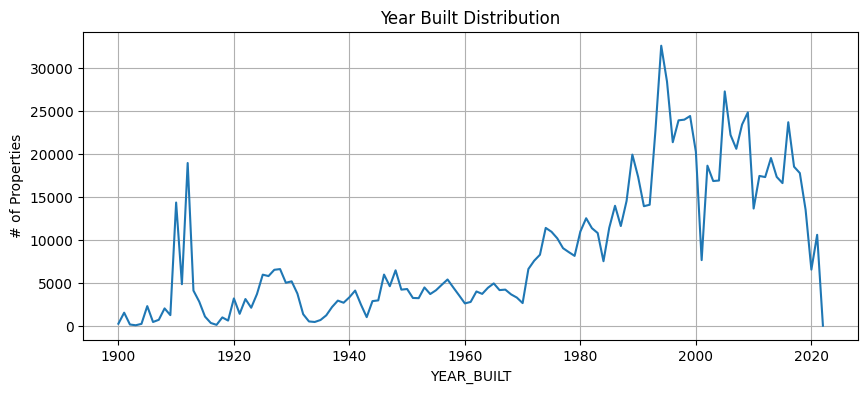

In [7]:
# --- Write your code below ---
plt.figure(figsize=(10, 4))
df_counts = df[df['YEAR_BUILT'] >= 1900]
df_counts = df_counts['YEAR_BUILT'].value_counts().sort_index()
plt.plot(df_counts.index, df_counts.values)
plt.title('Year Built Distribution')
plt.xlabel('YEAR_BUILT')
plt.ylabel('# of Properties')
plt.grid(True)
plt.show()


Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. Downtrend in late 2010s/early 2020s
2. There is a massive spike around 1910-1915

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

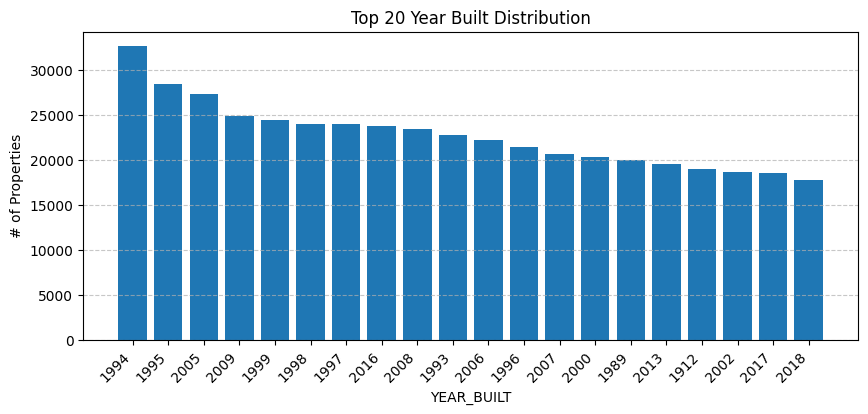

In [8]:
# --- Write your code below ---
top_20 = df_counts.nlargest(20).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(range(len(top_20)), top_20.values)
plt.title('Top 20 Year Built Distribution')
plt.xlabel('YEAR_BUILT')
plt.xticks(range(len(top_20)), top_20.index.astype(int), rotation=45, ha="right")  # Rotate and align labels
plt.ylabel('# of Properties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. 1994 has the highest number of properties built.
2. 1912 is in the top 20 despite being over 100 years ago.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1900 and 2020? Please plot a histogram to answer this question.

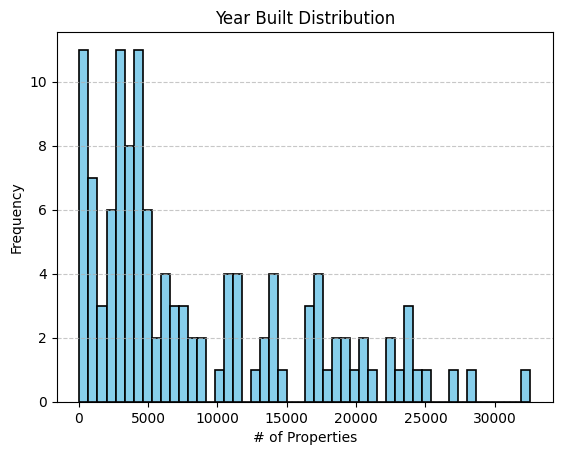

In [9]:
# --- Write your code below ---
plt.hist(df_counts.values, bins=50, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Year Built Distribution')
plt.xlabel('# of Properties')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The lowest bin contains the highest frequency
2. The # of properties trends downward in frequency

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

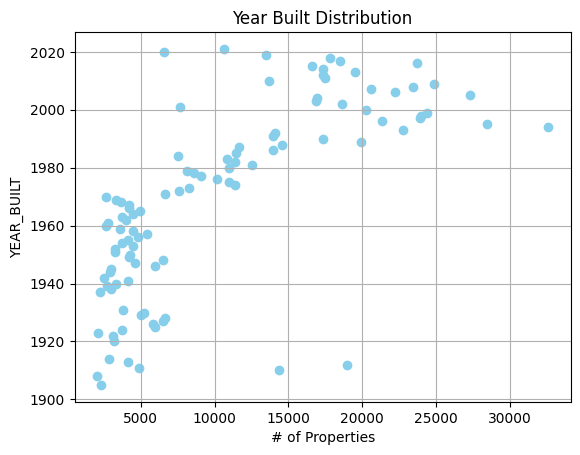

In [10]:
# --- Write your code below ---
df_2000 = df_counts[df_counts.values >= 2000]
plt.scatter(df_2000.values, df_2000.index, color='skyblue')
plt.title('Year Built Distribution')
plt.xlabel('# of Properties')
plt.ylabel('YEAR_BUILT')
plt.grid(True)
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Scatterplot best fit line would appear to resemble a logarithmic function
2. Newer houses tend to be larger in quantity

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File May 2021**
* Download files: **pccfNat_fccpNat_052021.txt** and the [2021 PCCF Guide .pdf](https://abacus.library.ubc.ca/file.xhtml?persistentId=hdl:11272.1/AB2/9J8YUH/WJHERN&version=1.0) and place them in the same folder as this notebook.

#### Details about the dataset in the 2021 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11.  
  This is also included along with this notebook as **pccf_record_layout.csv**

In [11]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
displaymd(f"Number of lines in PCCF: {len(pclines):,}")

Number of lines in PCCF: 1,742,403

The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster.  
**TODO** write your improved code here.

In [12]:
# TODO: rewrite this function to make it run in about a minute (or just maybe 17 sec)

def gen_pccf():
    pcseries = pd.Series(pclines)
    pc_dict = {}
    for _, row in rldf.iterrows():
        start = row['Position'] - 1
        end = start + row['Size']
        field_name = row['Field name']
        pc_dict[field_name] = pcseries.str.slice(start=start, stop=end)
    pccf_df = pd.DataFrame(pc_dict)
    
    return pccf_df
pccf_df = gen_pccf()

In [13]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

Now we're ready to merge geolocation to our property data.

In [69]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

**TODO Outlier check**: Please take a look at the property locations by using a suitable visualization.
You can use the longitude and latitude information to plot the properties. Pick a suitable visualization to decide the right cutoff.
The goal is to check for outliers and remove them if necessary. 

Depending on the postal code PCCF year you are using, there can be outliers.
In case there are locations outside Vancouver, e.g. near Squamish, BC, outside Vancouver proper, please remove them.

If you decide to remove some postal codes, please write a comment explaining your decision.
Also, if after viewing the plot, you decide that all postal code locations are within Vancouver,
please write a comment to that effect.

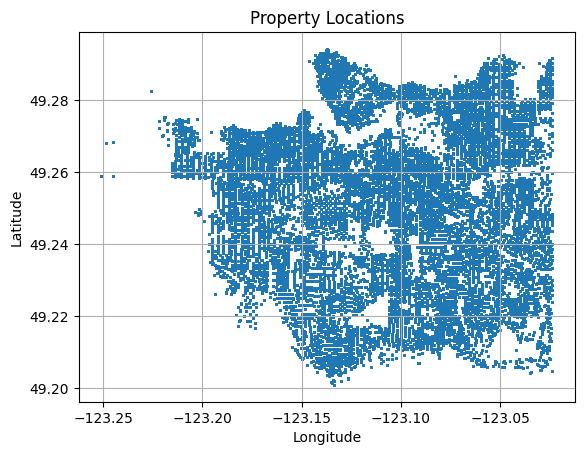

In [15]:
# See the TODO above.

# --- write your code here ---
# We can see that from the below scatterplot, the properties are located in the Vancouver area, as they form the shape of the lower mainland.
plt.scatter(dfgeo['LONG'], dfgeo['LAT'], s=1)
plt.title('Property Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [16]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap may be useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

C:\Users\rajan\AppData\Local\Temp\ipykernel_27544\407323472.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)


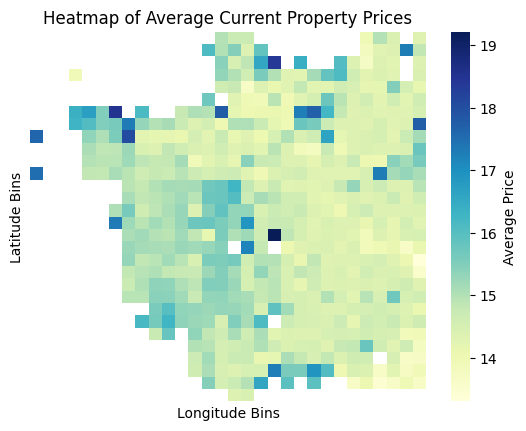

In [17]:
field = 'CURRENT_PRICE'
with plt.rc_context({'figure.figsize': (10,10)}):
    pass
    # TODO -- write your code here ---
means = heatmap_bins(dfgeo, ['LONG', 'LAT'], ncuts=30, aggarg='mean')
log_transformed_means = np.log1p(means['CURRENT_PRICE'])
sns.heatmap(log_transformed_means, cmap='YlGnBu', cbar_kws={'label': 'Average Price'})
plt.title('Heatmap of Average Current Property Prices')
plt.xlabel('Longitude Bins')
plt.ylabel('Latitude Bins')
plt.xticks([], []);
plt.yticks([], []);
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The east side of the map appears to have cheaper houses.
2. The most expensive bin is right around the center of the map.


### Task 9: Integrate with BC Assessment data

BC Assessment is a governmental institution that provides valuation estimates for real-estate properties, so-called folios, around British Columbia.

SFU Library recently obtained access to the BCA Advice data, subject to conditions laid out in their End-user license agreement (EULA), for instance:
* free for research and classroom use only
* publication of results only with BCA consent (i.e. no public github repo with data or results)
* follow further criteria listed in the EULA.

In order to use the dataset we prepared, you have to agree to the [EULA](https://1sfu-my.sharepoint.com/:b:/g/personal/sbergner_sfu_ca/ETLyzV-EYN5EpUVavrW7oxoB_ZOTnrsruwOqD3gEDO8Cvw?e=86wFlm) provided by BCA.

**Please follow the steps in the [BCA EULA sigsheet](https://1sfu-my.sharepoint.com/:x:/g/personal/sbergner_sfu_ca/EVXLCM0ikLdDrZ6_RHnlRhcBm1edMIcSaRrZcugM83nHWw?e=uYD9v8) to obtain the dataset.**

In [18]:
# Load the dataset

bcadf = pd.read_csv('bca-data/sales-residential-2022-cleaned.csv')

C:\Users\rajan\AppData\Local\Temp\ipykernel_27544\633965471.py:3: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  bcadf = pd.read_csv('bca-data/sales-residential-2022-cleaned.csv')


#### 9.a Add latitude and longitude info

**TODO:** Obtain geographic coordinates for Canadian postal codes and merge them with existing dataframe

Use the `pccf_df` that you made before and join it with the bca data. Ensure that you get latitude and longitude, as well as, CSDname of the city or community for each folioID.


In [62]:
bcadf['postalCode'] = bcadf['postalCode'].str.replace(' ','')
pcbc = pccf_df.merge(bcadf, left_on='Postal code', right_on='postalCode', how='inner')

#### 9.b Create a quantitative map of Vancouver properties

Use the CSDName and limit the dataset to foloID's for `Vancouver` only. Then  perform the following:

Create a plot of `conveyancePrice` on a map. You can either draw individual color coded points or construct a heatmap using code from before.

C:\Users\rajan\AppData\Local\Temp\ipykernel_27544\407323472.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)


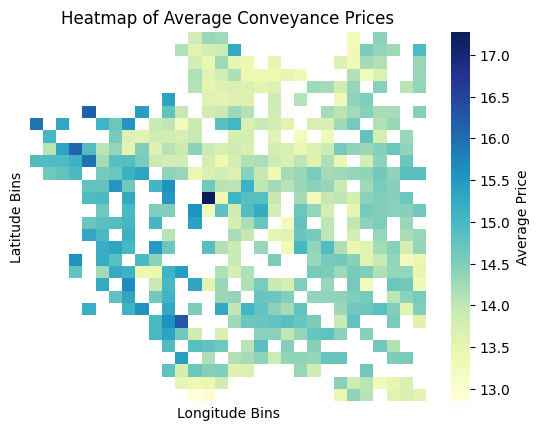

In [68]:
pcbc_van = pcbc[pcbc['CSDname'].str.strip() == "Vancouver"]
means = heatmap_bins(pcbc_van, ['LONG', 'LAT'], ncuts=30, aggarg='mean')
log_means = np.log1p(means['conveyancePrice'])
sns.heatmap(log_means, cmap='YlGnBu', cbar_kws={'label': 'Average Price'})
plt.title('Heatmap of Average Conveyance Prices')
plt.xlabel('Longitude Bins')
plt.ylabel('Latitude Bins')
plt.xticks([], []);
plt.yticks([], []);
plt.show()

#### 9.c Create one or multiple plots to explore possible relationships between other quantitative variables and conveyancePrice

For this question, please use the entire dataset.

1. Create a plot that shows how `conveyancePrice` relates to two (or more) other quantitative variables. We are hoping to use this plot to think about possible modeling choices for price predictions.

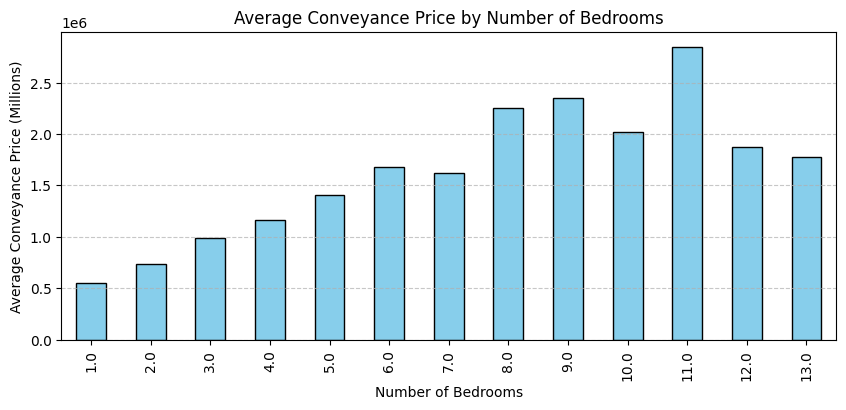

In [117]:
avg_price_by_beds = pcbc.groupby('num_bedrooms')['conveyancePrice'].mean()

plt.figure(figsize=(10, 4))

# Bar plot for average conveyance price by number of bedrooms
avg_price_by_beds.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Conveyance Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Conveyance Price (Millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


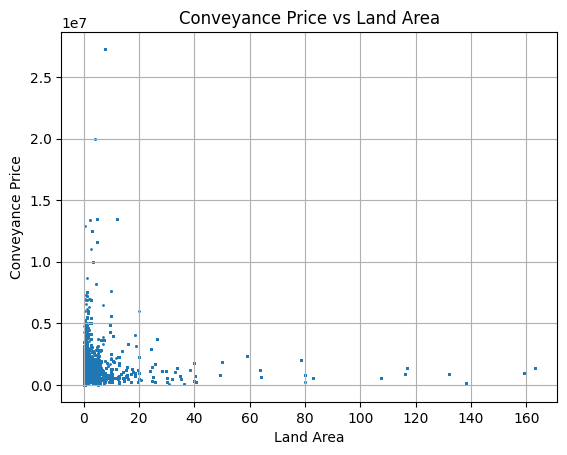

In [124]:
plt.scatter(pcbc['land_area'], pcbc['conveyancePrice'], s=1)
plt.title('Conveyance Price vs Land Area')
plt.xlabel('Land Area')
plt.ylabel('Conveyance Price')
plt.grid(True)
plt.show()

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A4.ipynb</font> to the CourSys activity [Assignment 4](https://courses.cs.sfu.ca/2024sp-cmpt-733-g1/+a4/). 